# Trainer:

Md. Jalal Uddin, Founder and director of Research Society 

email: dmjalal90@gmail.com, 20205103002@nuist.edu.cn

# Install netcdf4

step 1: run Anaconda as Administrator

step 2: you need to use the following command if you are a anaconda user

conda install -c anaconda netcdf4 

Or you need to use the following command if you are a python user

pip install netCDF4

# Install Cartopy

step 1: run Anaconda as Administrator
    
step 2: you need to use the following command if you are a anaconda user

conda install -c conda-forge cartopy

# Install xarray

step 1: run Anaconda as Administrator
    
step 2: you need to use the following command if you are a anaconda user

conda install -c anaconda xarray

In [1]:
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import netcdf
import cartopy.crs as ccrs

ModuleNotFoundError: No module named 'netCDF4'

# Know your data

In [2]:
data = Dataset(r'precipitation.nc')

print(data.variables.keys())  # print the variable name

dict_keys(['gwgt', 'lat', 'lon', 'time', 'prc'])


In [3]:
for var in data.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float32 gwgt(lat)
    long_name: gaussian weights
    short_name: gwgts
    units: dimensionless
unlimited dimensions: 
current shape = (64,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    short_name: lat
    long_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (64,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    short_name: lon
    long_name: longitude
    units: degrees_east
unlimited dimensions: 
current shape = (128,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    long_name: Year-Month
    short_name: YRMO
    units: yyyymm
    _FillValue: -999
unlimited dimensions: 
current shape = (216,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float32 prc(time, lat, lon)
    short_name: PRC
    long_name: Precipita

In [4]:
ds = xr.open_dataset('precipitation.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 128, time: 216)
Coordinates:
  * lat      (lat) float32 -87.8638 -85.09653 -82.31291 ... 85.09653 87.8638
  * lon      (lon) float32 0.0 2.8125 5.625 8.4375 ... 351.5625 354.375 357.1875
  * time     (time) float64 7.901e+03 7.902e+03 ... 9.611e+03 9.612e+03
Data variables:
    gwgt     (lat) float32 ...
    prc      (time, lat, lon) float32 ...
Attributes:
    title:        CPC Merged Monthly Precipitation Estimates
    source:       Pingping Xie and Phil Arkin (CPC); xping@sgi17.wwb.noaa.gov
    history:      \nFile read in the original format received \nCPC source na...
    references:   \nXie and Arkin, 1996:\nAnalyses of Global Monthly Precipit...
    Conventions:  none

# Know your variable

In [5]:
data.variables['prc']

<class 'netCDF4._netCDF4.Variable'>
float32 prc(time, lat, lon)
    short_name: PRC
    long_name: Precipitation
    units: mm/day
    _FillValue: -999.0
unlimited dimensions: 
current shape = (216, 64, 128)
filling on

# We need to know the minimum and maximum latlon for mapping

In [6]:
print("min_lat  = ", min(data.variables['lat']))
print("max_lat  = ", max(data.variables['lat']))
print("min_lon  = ", min(data.variables['lon']))
print("max_lon  = ", max(data.variables['lon']))

min_lat  =  -87.8638
max_lat  =  87.8638
min_lon  =  0.0
max_lon  =  357.1875


In [7]:
lat  = data.variables['lat'][:]
lon  = data.variables['lon'][:]
time = data.variables['time'][:]
prc  = data.variables['prc'][:]

mean_rainfall = np.mean(prc, axis=0)
print(mean_rainfall)

[[0.328615   0.32649407 0.32465214 ... 0.3369908  0.333855   0.33105692]
 [0.2591474  0.26262572 0.26580238 ... 0.24838836 0.25187734 0.25541523]
 [0.39385906 0.39131266 0.38667652 ... 0.3910227  0.39348662 0.3945333 ]
 ...
 [0.57567424 0.5975326  0.6245758  ... 0.55330473 0.5529246  0.56047904]
 [0.64617604 0.65975326 0.67477953 ... 0.61600125 0.6242001  0.6342811 ]
 [0.5605251  0.57392156 0.5873435  ... 0.52158374 0.5343335  0.5472972 ]]


Text(0, 0.5, 'Latitude')

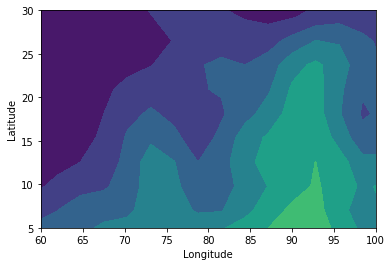

In [8]:
plt.contourf(lon, lat, mean_rainfall)
plt.xlim(60,100)
plt.ylim(5,30)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Understanding the transform and projection keywords

https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html

https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html   

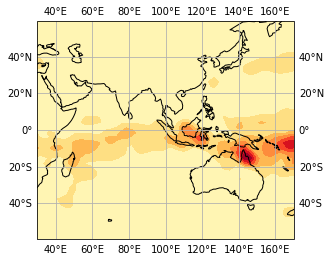

In [10]:
dataset = netcdf.netcdf_file('precipitation.nc', maskandscale = True, mmap = False)

prc  = dataset.variables['prc'][0, :, :]
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]

ax   = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lons, lats, prc, cmap = 'YlOrRd', transform=ccrs.PlateCarree())


ax.set_extent([30, 170, -30, 30])   # regional map (x0, x1, y0, y1)  
ax.coastlines()
ax.gridlines(draw_labels=True)
plt.show()

# Adding Features to the Map

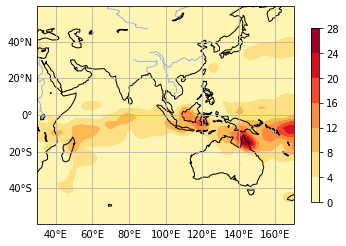

In [11]:
import cartopy.feature

ax   = plt.axes(projection=ccrs.PlateCarree())

plot = plt.contourf(lons, lats, prc, cmap = 'YlOrRd', transform=ccrs.PlateCarree())
plt.colorbar(plot, ax=ax, shrink=0.8)

ax.set_extent([30, 170, -30, 30])   # regional map (x0, x1, y0, y1)  
ax.coastlines()

gl = ax.gridlines(draw_labels=True)
gl.top_labels   = False
gl.right_labels = False


ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
plt.show()

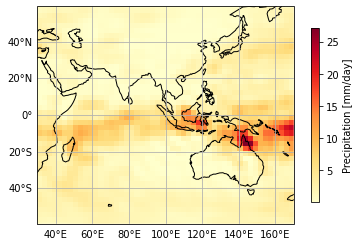

In [12]:
ds = xr.open_dataset('precipitation.nc')

prc  = ds.prc[0,:,:]

ax1   = plt.axes(projection = ccrs.PlateCarree())
ax1.set_extent([30, 170, -30, 30])   # regional map (x0, x1, y0, y1)  
ax1.coastlines()

gl = ax1.gridlines(draw_labels=True)
gl.top_labels   = False
gl.right_labels = False

prc.plot(ax=ax1, cmap = 'YlOrRd', transform=ccrs.PlateCarree(),cbar_kwargs={'shrink': 0.8})
plt.title('')
plt.show()